In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
#импорт дата сета
df_car = pd.read_csv('cars.csv')

In [29]:
#исследуем дата сет
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               359 non-null    int64  
 1   price            359 non-null    float64
 2   year             359 non-null    int64  
 3   mileage          359 non-null    float64
 4   diesel           359 non-null    int64  
 5   hybrid           359 non-null    int64  
 6   mt               359 non-null    int64  
 7   front.drive      359 non-null    int64  
 8   rear.drive       359 non-null    int64  
 9   engine.power     359 non-null    int64  
 10  engine.capacity  359 non-null    float64
 11  sedan            359 non-null    int64  
 12  hatchback        359 non-null    int64  
 13  wagon            359 non-null    int64  
 14  coupe            359 non-null    int64  
 15  cabriolet        359 non-null    int64  
 16  minivan          359 non-null    int64  
 17  pickup          

In [30]:
df_car.describe()

,id,price,year,mileage,diesel,hybrid,mt,front.drive,rear.drive,engine.power,engine.capacity,sedan,hatchback,wagon,coupe,cabriolet,minivan,pickup,sell_year,sell_price
count,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.0,359.0,359.000000,359.000000,359.000000,359.000000,359.000000,359.0,359.000000,359.000000,359.0,359.0,359.0,359.000000,3.590000e+02
mean,180.000000,1.202165e+06,2011.050139,85651.972145,0.041783,0.0,0.0,0.011142,0.807799,205.838440,2.214485,0.827298,0.0,0.016713,0.155989,0.0,0.0,0.0,112.504178,7.761955e+04
std,103.778611,1.556460e+05,0.889255,35548.245979,0.200372,0.0,0.0,0.105113,0.394580,35.032014,0.670205,0.378517,0.0,0.128373,0.363351,0.0,0.0,0.0,463.830420,3.237441e+05
min,1.000000,7.990000e+05,2010.000000,5000.000000,0.000000,0.0,0.0,0.000000,0.000000,170.000000,1.800000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00
25%,90.500000,1.100000e+06,2010.000000,64500.000000,0.000000,0.0,0.0,0.000000,1.000000,184.000000,1.800000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00
50%,180.000000,1.200000e+06,2011.000000,80888.000000,0.000000,0.0,0.0,0.000000,1.000000,184.000000,1.800000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00
75%,269.500000,1.307500e+06,2012.000000,100500.000000,0.000000,0.0,0.0,0.000000,1.000000,231.000000,3.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00
max,359.000000,1.500000e+06,2014.000000,270000.000000,1.000000,0.0,0.0,1.000000,1.000000,306.000000,3.600000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,2020.000000,1.734200e+06


# Выводы
Атрибуты hybrid, mt, hatchback, cabriolet, minivan, pickup заполнены только нулевыми значениями, а значит не влияют на выводы по предоставленному датасету. 
Для обучения модели их можно исключить. 

In [24]:
#добавляем столбцы с годом и ценой продажи и предзаполняем их
df_car['sell_year'] = 0
df_car['sell_price'] = 0

for i in range(11):
    tmp = random.randint(0, 358)
    while (df_car.loc[tmp, 'sell_year'] != 0):
        tmp = random.randint(0, 358)
    df_car.loc[tmp, 'sell_year'] = 2019 
    df_car.loc[tmp, 'sell_price'] = 1.14 * int(df_car.loc[tmp, 'price'])

for i in range(9):
    tmp = random.randint(0, 358)
    while (df_car.loc[tmp, 'sell_year'] != 0):
        tmp = random.randint(0, 358)
    df_car.loc[tmp, 'sell_year'] = 2020 
    df_car.loc[tmp, 'sell_price'] = 1.16 * int(df_car.loc[tmp, 'price'])
  

### Задача финансового директора
Цель: 
Увеличить прибыль компании.
Решение:
Проведем анализ цены продажи относительно цены покупки за отчетный период. Покажем динамику между отчетными периодами.

In [75]:
df_1 = df_car.groupby('sell_year')['price','sell_price'].sum()
df_1 = df_1.reset_index()
df_1 = df_1.drop(0)
df_1['profit'] = (df_1['sell_price'] / df_1['price'] - 1) * 100

<ipython-input-75-3000044405e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1 = df_car.groupby('sell_year')['price','sell_price'].sum()


In [76]:
#Отчет по динамике прибыли
df_1.head()

,sell_year,price,sell_price,profit
1,2019,12823000.0,14618220.0,14.0
2,2020,11420000.0,13247200.0,16.0


In [77]:
df_1.drop(['price', 'sell_price'], axis='columns', inplace=True)

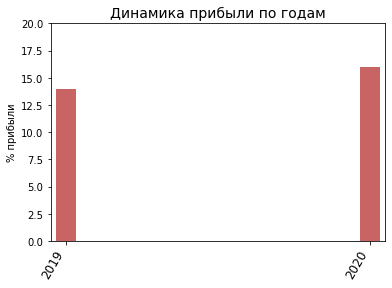

In [93]:
fig, ax = plt.subplots()
ax.vlines(x = df_1.sell_year, ymin = 0, ymax = df_1.profit, color='firebrick', alpha=0.7, linewidth=20)
plt.xticks(df_1.sell_year, df_1.sell_year, rotation=60, horizontalalignment='right', fontsize=12)
ax.set_title('Динамика прибыли по годам', fontdict={'size':14})
ax.set(ylabel='% прибыли', ylim=(0, 20))
plt.show()